In [2]:
import pandas as pd 
import numpy as np
from datetime import datetime
from matplotlib import dates
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('../train.csv',encoding='euc-kr')

In [4]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         282451 non-null  int64  
 1   Dept          282451 non-null  int64  
 2   Date          282451 non-null  object 
 3   Weekly_Sales  282451 non-null  float64
 4   IsHoliday     282451 non-null  bool   
 5   Temperature   282451 non-null  float64
 6   Fuel_Price    282451 non-null  float64
 7   MarkDown1     100520 non-null  float64
 8   MarkDown2     74232 non-null   float64
 9   MarkDown3     91521 non-null   float64
 10  MarkDown4     90031 non-null   float64
 11  MarkDown5     101029 non-null  float64
 12  CPI           282451 non-null  float64
 13  Unemployment  282451 non-null  float64
 14  Type          282451 non-null  object 
 15  Size          282451 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 32.6+ MB


In [6]:
#datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Day'] =df['Date'].dt.day
df['Week'] =df['Date'].dt.week

C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         282451 non-null  int64         
 1   Dept          282451 non-null  int64         
 2   Date          282451 non-null  datetime64[ns]
 3   Weekly_Sales  282451 non-null  float64       
 4   IsHoliday     282451 non-null  bool          
 5   Temperature   282451 non-null  float64       
 6   Fuel_Price    282451 non-null  float64       
 7   MarkDown1     100520 non-null  float64       
 8   MarkDown2     74232 non-null   float64       
 9   MarkDown3     91521 non-null   float64       
 10  MarkDown4     90031 non-null   float64       
 11  MarkDown5     101029 non-null  float64       
 12  CPI           282451 non-null  float64       
 13  Unemployment  282451 non-null  float64       
 14  Type          282451 non-null  object        
 15  Size          282

In [8]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,2011,8,26,34
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,2011,3,25,12
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,2010,12,3,48
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,2010,9,17,37
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,2012,5,18,20


In [9]:
#DATATYPE 변환
df['Type'] = df['Type'].astype('category')
df['IsHoliday'] = df['IsHoliday'].astype('category')
df['Store'] = df['Store'].astype('category')
df['Dept'] = df['Dept'].astype('category')
df['Temperature'] = (df['Temperature'] - 32) * 5/9

In [10]:
# 범주형 타입을 숫자로 인코딩
ordinal_ecd = OrdinalEncoder(dtype='int64')

encoded = ordinal_ecd.fit_transform(df['Type'].to_numpy().reshape(-1,1))
df.loc[:,'Type'] = encoded
df['Type']

0         0
1         0
2         1
3         0
4         0
         ..
282446    0
282447    0
282448    0
282449    1
282450    0
Name: Type, Length: 282451, dtype: int64

In [11]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,26,92,2011-08-26,87235.57,False,16.166667,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,0,152513,2011,8,26,34
1,34,22,2011-03-25,5945.97,False,11.727778,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,0,158114,2011,3,25,12
2,21,28,2010-12-03,1219.89,False,10.238889,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,1,140167,2010,12,3,48
3,8,9,2010-09-17,11972.71,False,24.066667,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,0,155078,2010,9,17,37
4,19,55,2012-05-18,8271.82,False,14.894444,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,0,203819,2012,5,18,20


In [12]:
df.corr()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
Weekly_Sales,1.000000,-0.001079,0.002720,0.089862,0.023672,0.056325,0.045958,0.089408,-0.022459,-0.025850,-0.182275,0.243935,-0.008247,0.028490,-0.007012,0.027710
Temperature,-0.001079,1.000000,0.141401,-0.038149,-0.322061,-0.097665,-0.063267,-0.015839,0.181118,0.097465,0.043012,-0.058363,0.063059,0.236482,0.026389,0.236741
Fuel_Price,0.002720,0.141401,1.000000,0.064443,-0.219377,-0.100169,-0.043532,-0.127080,-0.163551,-0.033130,0.029567,0.004519,0.779979,-0.042392,0.026048,-0.032836
MarkDown1,0.089862,-0.038149,0.064443,1.000000,0.023582,-0.107273,0.818697,0.156025,-0.055405,0.048412,-0.259682,0.349236,0.143002,-0.175933,-0.294202,-0.198000
MarkDown2,0.023672,-0.322061,-0.219377,0.023582,1.000000,-0.049389,-0.007046,-0.009264,-0.039357,0.021996,-0.068026,0.109097,-0.223427,-0.002051,0.067588,0.002472
MarkDown3,0.056325,-0.097665,-0.100169,-0.107273,-0.049389,1.000000,-0.070472,-0.025661,-0.026254,0.013876,-0.036637,0.047606,-0.316552,0.186446,0.136266,0.194832
MarkDown4,0.045958,-0.063267,-0.043532,0.818697,-0.007046,-0.070472,1.000000,0.103712,-0.048088,0.021931,-0.111384,0.171120,0.126907,-0.193855,-0.313177,-0.217522
MarkDown5,0.089408,-0.015839,-0.127080,0.156025,-0.009264,-0.025661,0.103712,1.000000,0.059240,-0.003947,-0.254687,0.300980,-0.126473,0.097276,-0.138688,0.084857
CPI,-0.022459,0.181118,-0.163551,-0.055405,-0.039357,-0.026254,-0.048088,0.059240,1.000000,-0.302677,-0.065457,-0.005309,0.076018,0.004206,0.003399,0.005342
Unemployment,-0.025850,0.097465,-0.033130,0.048412,0.021996,0.013876,0.021931,-0.003947,-0.302677,1.000000,0.149021,-0.067772,-0.237130,-0.011329,-0.003235,-0.014334


In [13]:
#시계열
def encode_sin_cos(df,col_n,max_val):
    df[col_n+'_sin'] = np.sin(2*np.pi*df[col_n]/max_val)
    df[col_n+'_cos'] = np.cos(2*np.pi*df[col_n]/max_val)
    
    return df

df = encode_sin_cos(df,'Month',12)
df = encode_sin_cos(df,'Day',31)

df[['Year','Month','Day','Month_sin','Month_cos','Day_sin','Day_cos']]

df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]

Text(0.5, 0, 'Sine Encoded Months')

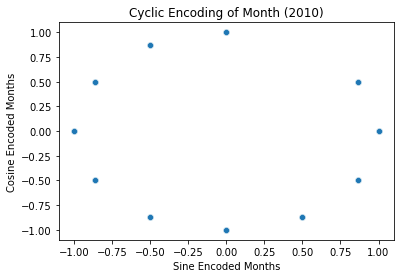

In [14]:
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2010)
c_m.set_title("Cyclic Encoding of Month (2010)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Months')

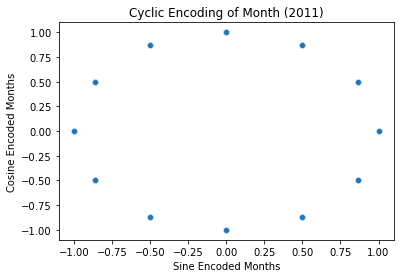

In [15]:
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2011)
c_m.set_title("Cyclic Encoding of Month (2011)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Months')

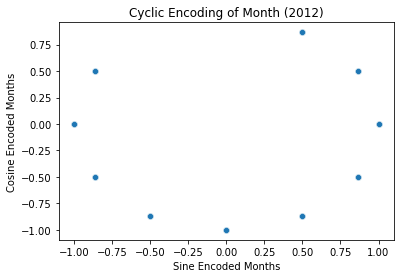

In [16]:
c_m = sns.scatterplot(x="Month_sin",y="Month_cos",data=df_2012)
c_m.set_title("Cyclic Encoding of Month (2012)")
c_m.set_ylabel("Cosine Encoded Months")
c_m.set_xlabel("Sine Encoded Months")

In [17]:
corr = df[['Store','Dept','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Year','Month','Day']].corr()
# corr['Weekly_Sales'].dtypes
corr['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243935
Type            0.182275
MarkDown1       0.089862
MarkDown5       0.089408
MarkDown3       0.056325
MarkDown4       0.045958
Month           0.028490
Unemployment    0.025850
MarkDown2       0.023672
CPI             0.022459
Year            0.008247
Day             0.007012
Fuel_Price      0.002720
Temperature     0.001079
Name: Weekly_Sales, dtype: float64

<AxesSubplot:>

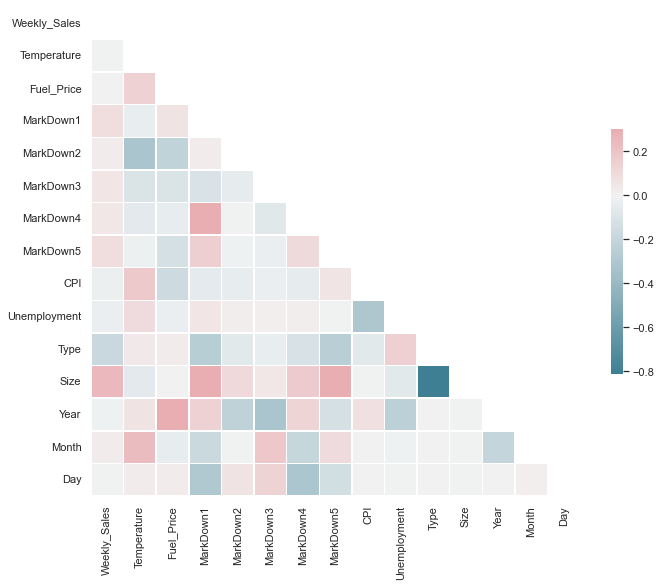

In [18]:
sns.set(style="white")

corr = df[['Store','Dept','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size','Year','Month','Day']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

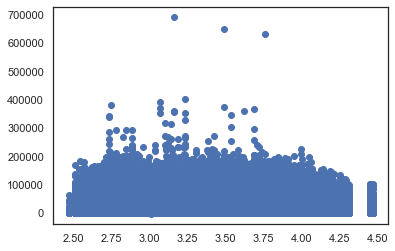

In [19]:
plt.scatter(df['Fuel_Price'],df['Weekly_Sales'])
plt.show()

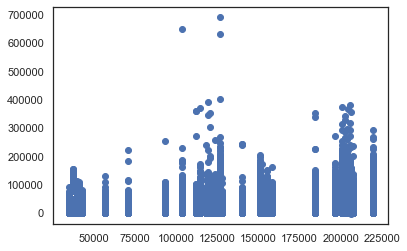

In [20]:
plt.scatter(df['Size'],df['Weekly_Sales'])
plt.show()

In [21]:
df.loc[df['Weekly_Sales'] >240000,"Date"].value_counts()

2011-11-25    15
2010-11-26    14
2010-12-24     8
2011-12-23     4
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

<AxesSubplot:ylabel='Temperature'>

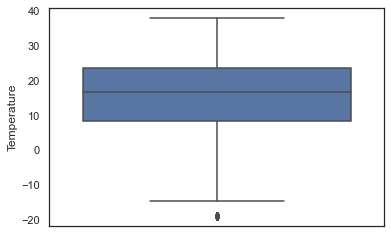

In [22]:
sns.boxplot(y = df['Temperature'])

<AxesSubplot:ylabel='Fuel_Price'>

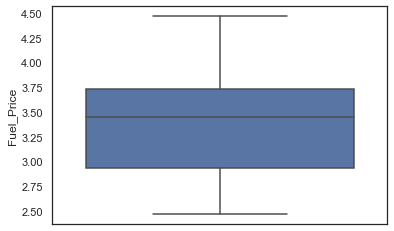

In [23]:

sns.boxplot(y = df['Fuel_Price'])

In [24]:
# pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시킵니다.
bins = [-100000, 0, 100000, 200000, 300000, 400000, 500000, 600000, 700000]
ctg = pd.cut(df['Weekly_Sales'], bins=bins)
# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인
ctg.value_counts().sort_index()

(-100000, 0]           900
(0, 100000]         278143
(100000, 200000]      3300
(200000, 300000]        87
(300000, 400000]        17
(400000, 500000]         1
(500000, 600000]         0
(600000, 700000]         3
Name: Weekly_Sales, dtype: int64

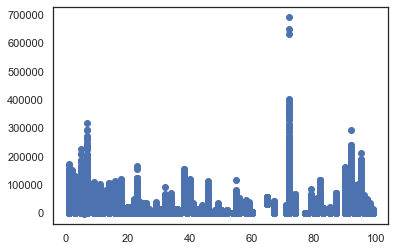

In [25]:
#부서별 판매액
plt.scatter(df['Dept'],df['Weekly_Sales'])
plt.show()

In [26]:
#변수별 관계 파악
#sns.pairplot(df, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'],)

In [27]:
#sns.pairplot(df, vars=['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

<class 'numpy.float64'>


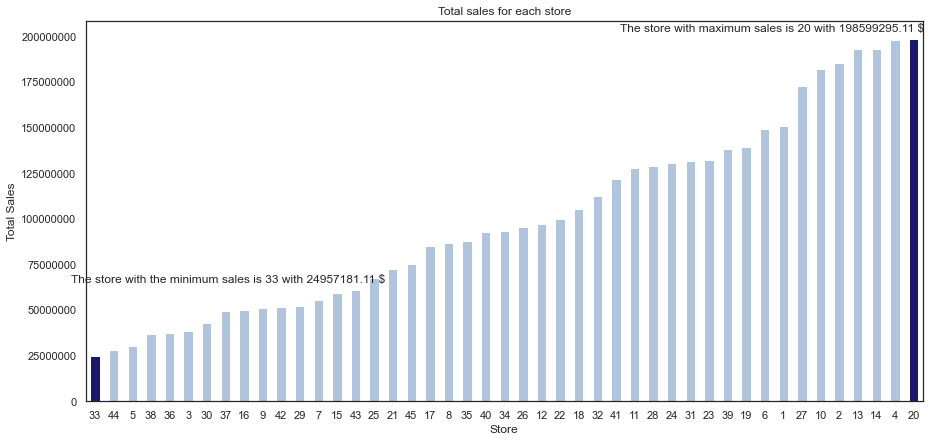

In [28]:
#가게별 총매출 
data = df
plt.figure(figsize=(15,7))

total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores with the lowest and highest sales

clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# Store with minimum sales

p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store with the minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Store with maximum sales 

p = ax.patches[44]
ax.annotate("The store with maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Plot properties

plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

<class 'numpy.float64'>


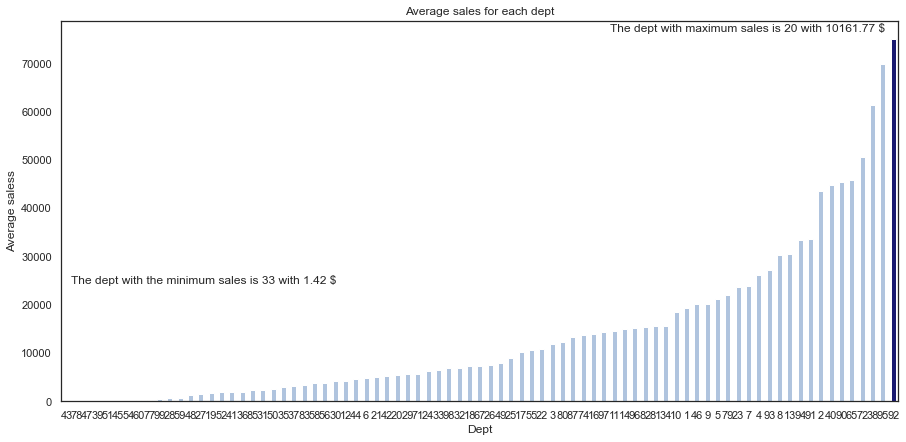

In [29]:
#부서별 평균매출 
data = df
plt.figure(figsize=(15,7))

total_sales_for_each_dept = data.groupby('Dept')['Weekly_Sales'].mean().sort_values() 
total_sales_for_each_dept_array = np.array(total_sales_for_each_dept) # convert to array

# Assigning a specific color for the stores with the lowest and highest sales

clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_dept_array)) and (x > min(total_sales_for_each_dept_array))) else 'midnightblue' for x in total_sales_for_each_dept_array]


ax = total_sales_for_each_dept.plot(kind='bar',color=clrs);

# Store with minimum sales

p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The dept with the minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Store with maximum sales 

p = ax.patches[44]
ax.annotate("The dept with maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# Plot properties

plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Average sales for each dept')
plt.xlabel('Dept')
plt.ylabel('Average saless');

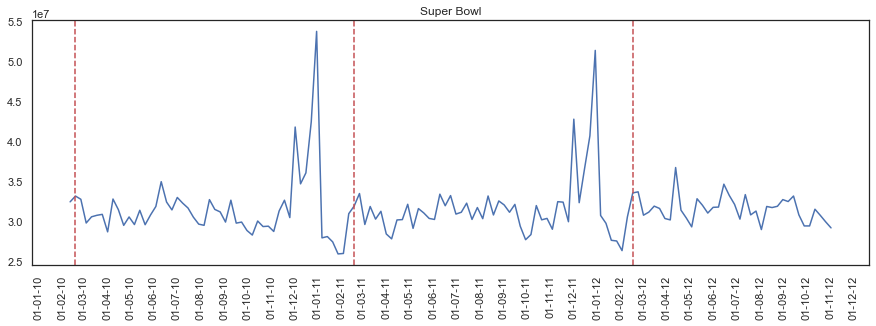

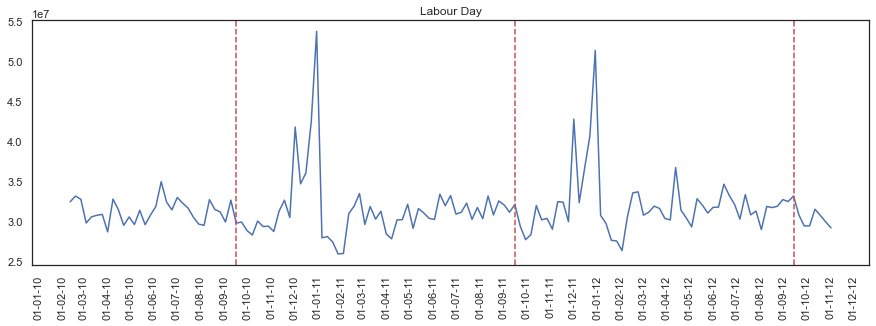

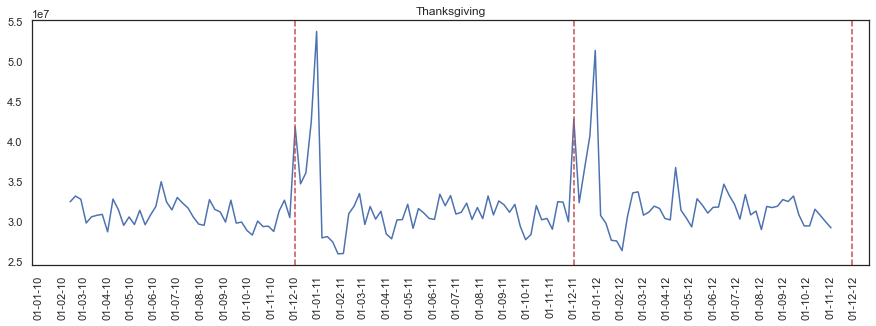

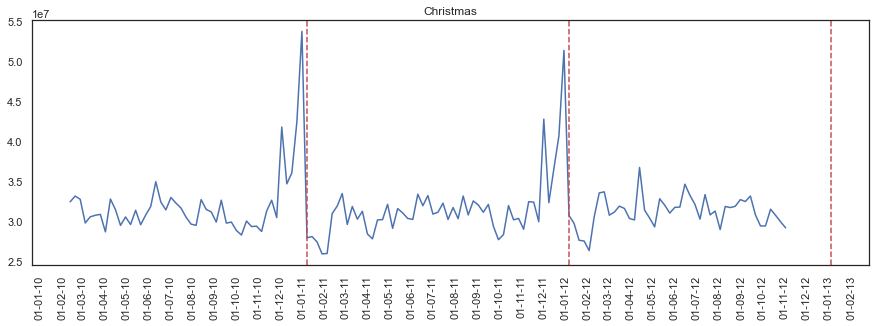

In [30]:
#휴일별 매출액
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

In [31]:
df['Size'].unique()

array([152513, 158114, 140167, 155078, 203819, 219622, 202307, 203007,
       118221,  39910, 205863, 202505,  34875, 103681, 206302,  39690,
        57197, 151315, 204184, 119557, 155083, 120653, 128107, 126512,
       203742, 196321,  42988, 200898, 207499,  93188, 114533, 123737,
        70713,  93638,  37392, 184109, 125833, 112238, 203750,  41062],
      dtype=int64)

In [32]:
#가게 사이즈별 확인(임의로 나눴는데 보다 좋은 기준이 있으면 좋을 것 같음)

bins = [0, 50000, 100000,150000, 200000,250000]
ctg = pd.cut(df['Size'], bins=bins)
ctg.value_counts().sort_index()

(0, 50000]          49176
(50000, 100000]     25855
(100000, 150000]    71449
(150000, 200000]    47065
(200000, 250000]    88906
Name: Size, dtype: int64

In [33]:
conditionlist = [
    (df['Size'] <= 50000) ,
    (df['Size'] >= 50000) & (df['Size'] <=100000),
    (df['Size'] >= 100000) & (df['Size'] <=150000),
    (df['Size'] >= 150000) & (df['Size'] <=200000),
    (df['Size'] <= 250000)]
choicelist = ['S', 'SM', 'M','ML','L']
df['Size_category'] = np.select(conditionlist, choicelist, default='Not Specified')

In [34]:
df[['Size','Size_category']]

,Size,Size_category
0,152513,ML
1,158114,ML
2,140167,M
3,155078,ML
4,203819,L
...,...,...
282446,204184,L
282447,184109,ML
282448,200898,L
282449,123737,M


Text(0.5, 0, 'Size_category')

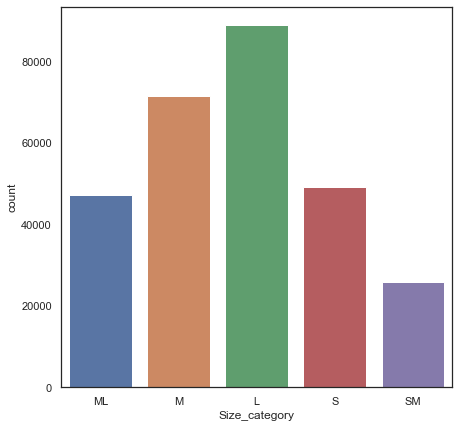

In [35]:
#매장 사이즈별 개수 확인
fig,ax = plt.subplots(1,1,figsize=(7,7))
sns.countplot(data=df,x='Size_category',ax=ax)
ax.set_xlabel('Size_category')

In [36]:
#매장 사이즈별 매출 평균
wksale_by_sizeS = df[df['Size_category']=='S']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeSM = df[df['Size_category']=='SM']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeM = df[df['Size_category']=='M']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeML = df[df['Size_category']=='ML']['Weekly_Sales'].groupby(df['Week']).mean()
wksale_by_sizeL = df[df['Size_category']=='L']['Weekly_Sales'].groupby(df['Week']).mean()


C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

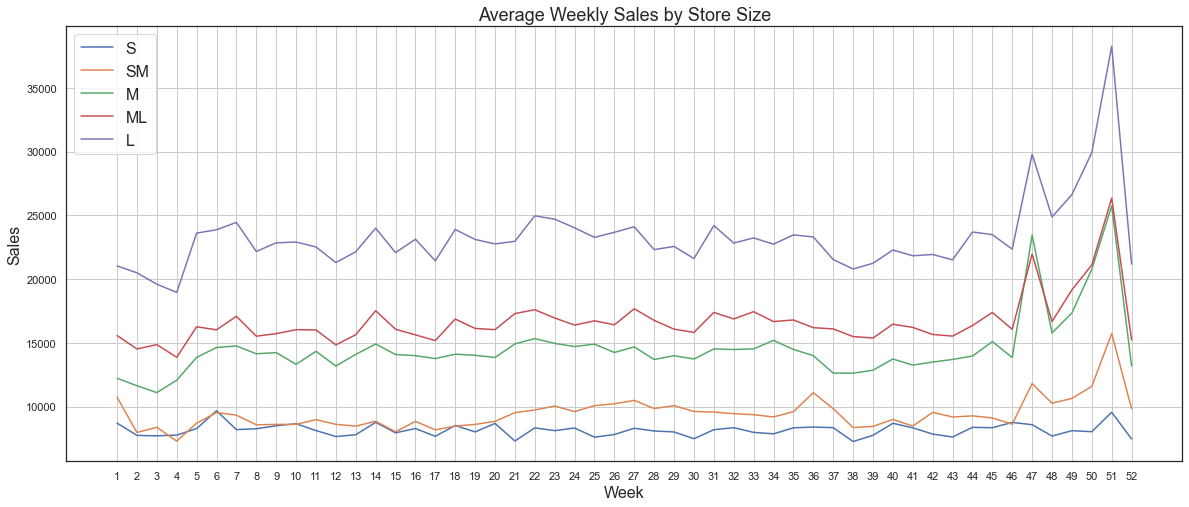

In [37]:
# 매장 사이즈별 매출 => ML 사이즈의 매장이 S,M 사이즈의 매장보다 수가 적지만 매출액은 높음 => 가게가 클수록 매출액이 높다.
plt.figure(figsize=(20,8))
sns.lineplot(wksale_by_sizeS.index,wksale_by_sizeS.values)
sns.lineplot(wksale_by_sizeSM.index,wksale_by_sizeSM.values)
sns.lineplot(wksale_by_sizeM.index,wksale_by_sizeM.values)
sns.lineplot(wksale_by_sizeML.index,wksale_by_sizeML.values)
sns.lineplot(wksale_by_sizeL.index,wksale_by_sizeL.values)
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['S','SM','M','ML','L'], loc='best', fontsize=16)
plt.title('Average Weekly Sales by Store Size', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


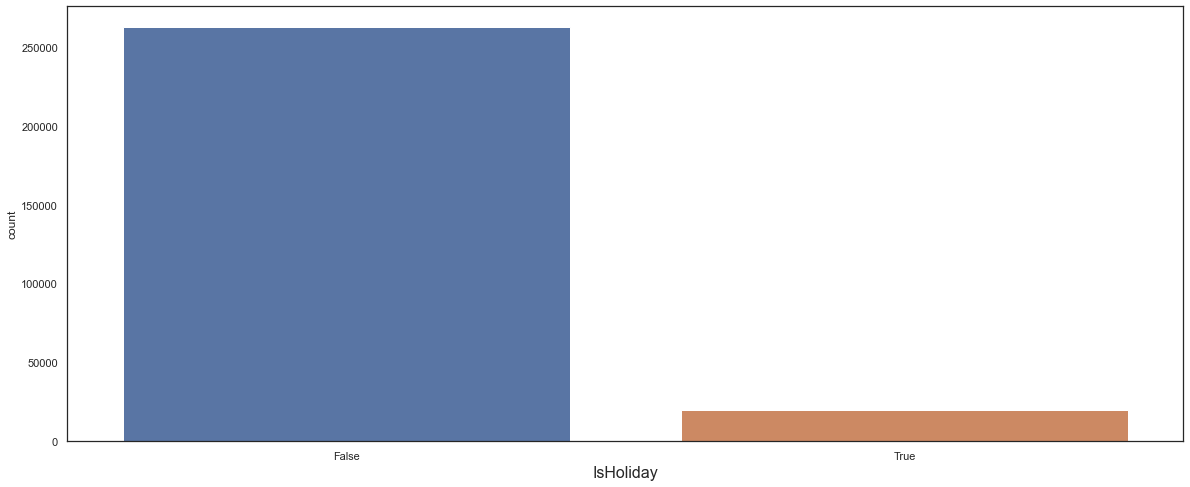

In [38]:
#휴일 수
fig = plt.figure(figsize=(20,8))
sns.countplot(x=df['IsHoliday'])
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


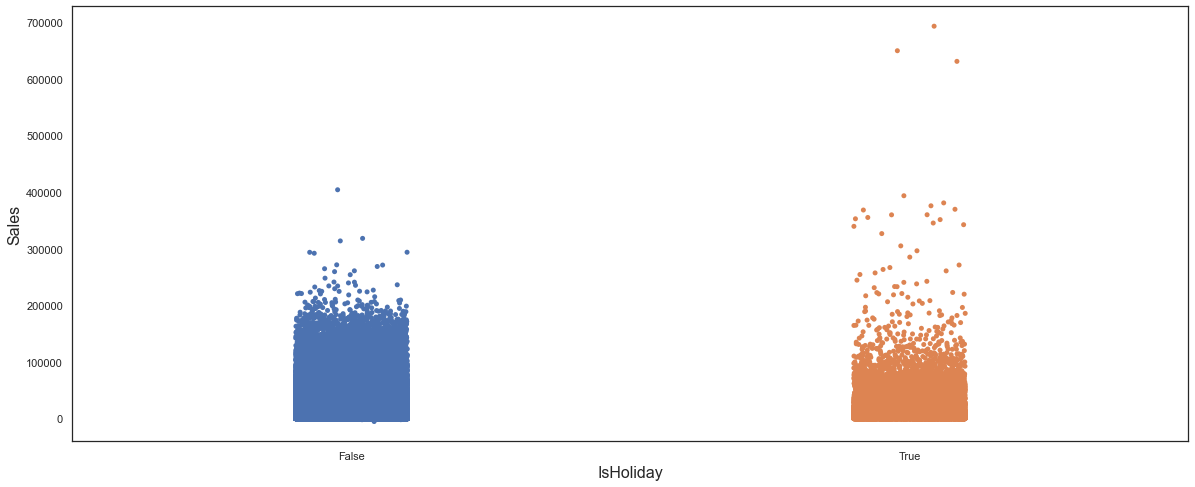

In [39]:
#휴일/비휴일 매출 분포
fig = plt.figure(figsize=(20,8))
sns.stripplot(y=df.Weekly_Sales, x=df['IsHoliday'])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


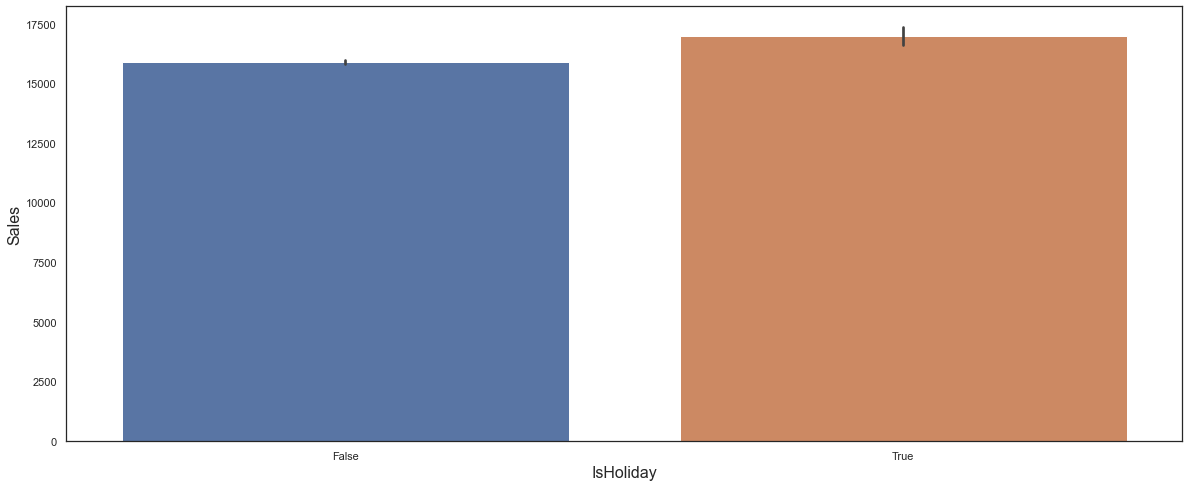

In [40]:
#휴일/비휴일 총 매출
fig = plt.figure(figsize=(20,8))
sns.barplot(y=df.Weekly_Sales, x=df['IsHoliday'])
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

In [41]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Size,Year,Month,Day,Week,Month_sin,Month_cos,Day_sin,Day_cos,Size_category
0,26,92,2011-08-26,87235.57,False,16.166667,3.796,NaN,NaN,NaN,...,152513,2011,8,26,34,-8.660254e-01,-5.000000e-01,-0.848644,0.528964,ML
1,34,22,2011-03-25,5945.97,False,11.727778,3.480,NaN,NaN,NaN,...,158114,2011,3,25,12,1.000000e+00,6.123234e-17,-0.937752,0.347305,ML
2,21,28,2010-12-03,1219.89,False,10.238889,2.708,NaN,NaN,NaN,...,140167,2010,12,3,48,-2.449294e-16,1.000000e+00,0.571268,0.820763,M
3,8,9,2010-09-17,11972.71,False,24.066667,2.582,NaN,NaN,NaN,...,155078,2010,9,17,37,-1.000000e+00,-1.836970e-16,-0.299363,-0.954139,ML
4,19,55,2012-05-18,8271.82,False,14.894444,4.029,12613.98,NaN,11.50,...,203819,2012,5,18,20,5.000000e-01,-8.660254e-01,-0.485302,-0.874347,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282446,27,18,2012-10-19,20775.91,False,13.627778,4.153,2639.32,NaN,4.77,...,204184,2012,10,19,42,-8.660254e-01,5.000000e-01,-0.651372,-0.758758,L
282447,39,36,2010-05-21,5350.00,False,24.816667,2.826,NaN,NaN,NaN,...,184109,2010,5,21,20,5.000000e-01,-8.660254e-01,-0.897805,-0.440394,ML
282448,14,29,2010-04-30,10939.87,False,11.750000,2.921,NaN,NaN,NaN,...,200898,2010,4,30,17,8.660254e-01,-5.000000e-01,-0.201299,0.979530,L
282449,15,90,2011-07-01,5013.89,False,19.683333,3.916,NaN,NaN,NaN,...,123737,2011,7,1,26,-5.000000e-01,-8.660254e-01,0.201299,0.979530,M


In [42]:
df['Store'].sort_values().unique()

[1, 2, 3, 4, 5, ..., 41, 42, 43, 44, 45]
Length: 45
Categories (45, int64): [1, 2, 3, 4, ..., 42, 43, 44, 45]

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

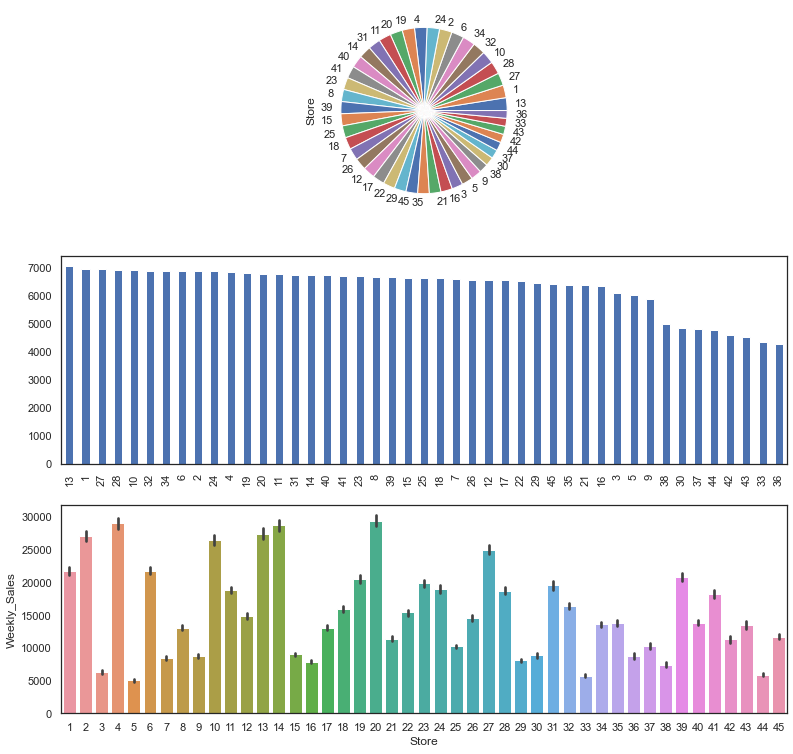

In [43]:
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(13,13))
fig.patch.set_facecolor('white')

s_store = df['Store'].value_counts().sort_values(ascending=False)
s_store.plot(kind='pie',ax=ax[0])
s_store.plot(kind='bar',ax=ax[1])
sns.barplot(data=df,x='Store',y='Weekly_Sales',ax=ax[2])

In [44]:
df['Dept'].sort_values().unique()

[1, 2, 3, 4, 5, ..., 95, 96, 97, 98, 99]
Length: 81
Categories (81, int64): [1, 2, 3, 4, ..., 96, 97, 98, 99]

In [45]:
df['Fuel_Price'].describe()

count    282451.000000
mean          3.360300
std           0.458602
min           2.472000
25%           2.932000
50%           3.452000
75%           3.737000
max           4.468000
Name: Fuel_Price, dtype: float64

In [46]:
# pandas의 cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형시킵니다.
bins = [2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5]
ctg = pd.cut(df['Fuel_Price'], bins=bins)
# 구간별로 값이 몇 개가 속해 있는지 value_counts()로 확인
ctg.value_counts().sort_index()

(2.25, 2.5]       25
(2.5, 2.75]    34850
(2.75, 3.0]    47446
(3.0, 3.25]    32651
(3.25, 3.5]    34001
(3.5, 3.75]    67531
(3.75, 4.0]    48198
(4.0, 4.25]    15567
(4.25, 4.5]     2182
Name: Fuel_Price, dtype: int64

<AxesSubplot:xlabel='Fuel_Price', ylabel='Count'>

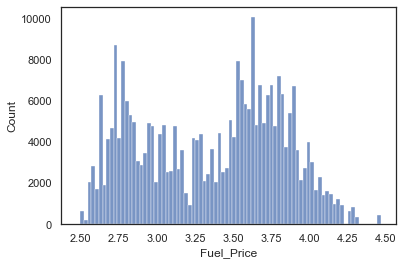

In [47]:
sns.histplot(df['Fuel_Price'])

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

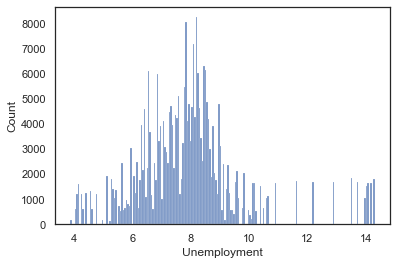

In [48]:
sns.histplot(df['Unemployment'])

C:\Users\popcorn\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CPI', ylabel='Weekly_Sales'>

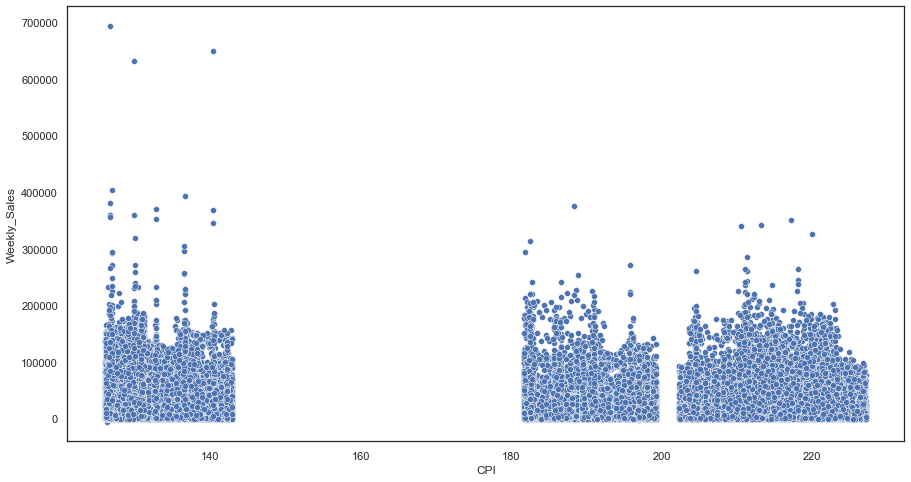

In [57]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(df['CPI'], df['Weekly_Sales'])

In [50]:
df[df['Type']==2]['Store'].unique()

[44, 38, 42, 30, 37, 43]
Categories (6, int64): [44, 38, 42, 30, 37, 43]

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

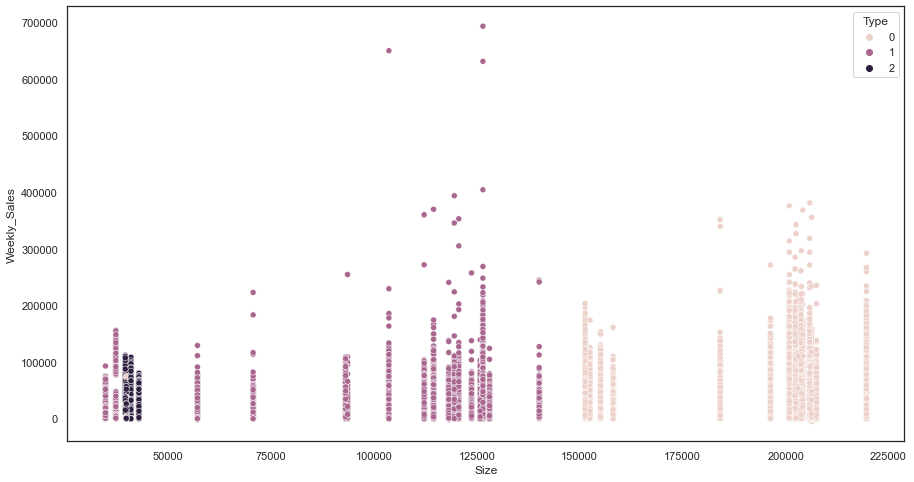

In [54]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'], hue=df['Type'])
# 동일한 타입에서 크기가 증가할 수록 판매량이 증가하는 경향을 확인 할 수 있음